# SyriaTel Telecom Customer Churn

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Understanding customer behavior is top of mind for every business today. Gaining insights into why and how customers buy can help grow revenue. But losing customers (also called customer churn) is always a risk, and insights into why customers leave can be just as important for maintaining revenues and profits. Machine learning (ML) can help with insights, but up until now you needed ML experts to build models to predict churn, the lack of which could delay insight-driven actions by businesses to retain customers.

> **Problem Statement:** You want to understand the customers like who can be easily converge [Target Customers] so that the marketing team can plan a strategy accordingly.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


# Loading the Data from the source i.e. csv
dataset_url = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(dataset_url)

df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
df.shape

(3333, 21)

In [3]:
print("Number of rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of rows 3333
Number of Columns 21


In [4]:
# Previewing the top of our dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The dataset contains 3333 rows and 21 columns. Our target variable is churn.

In [5]:
# Previewing the bottom of our dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#check 

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [8]:
# Checking for Outliers
#

In [9]:
# Checking for Anomalies
#

In [10]:
# Identifying the Missing Data
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We have no missing data

In [11]:
# Checking overall statistics about the dataset
df.describe(include = 'all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,377-7843,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


## Drop Irrelevant Columns

In [12]:
#Dropping irrelevant features
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [13]:
df = df.drop(['state', 'account length', 'area code', 'phone number'],axis = 1)

In [14]:
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encoding categorical data

Convert Categorical Features into Numerical <br />
The voice mail plan column and International plan column have two unique values which is yes or no

In [85]:

# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Instantiate an OrdinalEncoder
encoder_international_plan = OrdinalEncoder()

#Fit the encoder on street_train
encoder_international_plan.fit(df[['international plan']])

# Inspect the categories of the fitted encoder
#encoder_international_plan.categories_[0]

#Transform 
encoded_international_plan = encoder_international_plan.transform(df[['international plan']])

# Flatten for appropriate shape
encoded_international_plan = encoded_international_plan.flatten()

# Visually inspect street_encoded_train
encoded_international_plan # 0 for no, 1 for yes

array([0., 0., 0., ..., 0., 1., 0.])

In [87]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Instantiate an OrdinalEncoder
encoder_voicemail = OrdinalEncoder()

#Fit the encoder
encoder_voicemail.fit(df[['voice mail plan']]) 

# Inspect the categories of the fitted encoder
#encoder_voicemail.categories_[0]

#Transform 
encoded_voicemail = encoder_voicemail.transform(df[['voice mail plan']])

# Flatten for appropriate shape
encoded_voicemail = encoded_voicemail.flatten()

# Visually inspect street_encoded_train 
encoded_voicemail #0 for no,1 for yes

array([1., 1., 0., ..., 0., 0., 1.])

In [88]:
# Replace value of Voice mail plan
df['voice mail plan'] = encoded_voicemail

#Replace value of International plan
df['international plan'] = encoded_international_plan
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Checking for Class Imbalance

In [18]:
##changing bool to int 
df["churn"] = df["churn"].astype(int)
df.head()


,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:
print('Raw counts: \n')
print(df['churn'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['churn'].value_counts(normalize=True))

Raw counts: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------
Normalized counts: 

0    0.855086
1    0.144914
Name: churn, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='count'>

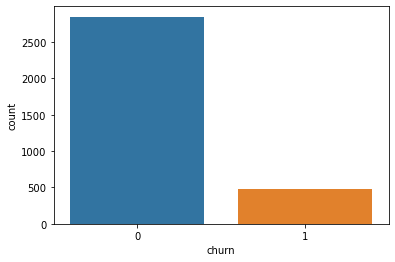

In [20]:
sns.countplot(df['churn'])

From the countplot, we can see that the data is imbalanced.

## Handling imbalanced data with SMOTE


In [21]:
y = df['churn']
X = df.drop(columns = 'churn') 

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [24]:
y_resample.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

## Splitting data into Training set and Testing set

In [25]:
#split data using the train_test_split module imported above

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.20, random_state = 42)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#Instantiate a scaler
scaler = StandardScaler()

#transform the X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [28]:
#Instantiate a logReg model
log = LogisticRegression()

In [29]:
log.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_predict1 = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict1)

0.7666666666666667

Next we check for precision, recall and f1 score.

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
precision_score(y_test, y_predict1)

0.7521815008726004

In [34]:
recall_score(y_test, y_predict1)

0.7765765765765765

In [35]:
f1_score(y_test, y_predict1)

0.7641843971631205

## SVC

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [38]:
svm.fit(X_train, y_train)
y_predict2 = svm.predict(X_test)


In [39]:
# calculate paccuracy score
accuracy_score(y_test, y_predict2)

0.9236842105263158

In [40]:
precision_score(y_test, y_predict2)

0.9285714285714286

In [41]:
recall_score(y_test, y_predict2)

0.9135135135135135

In [42]:
f1_score(y_test, y_predict2)

0.9209809264305178

# KNeighbours Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#instantiate a knn class
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_predict3 = knn.predict(X_test)

In [47]:
accuracy_score(y_test, y_predict3)

0.9035087719298246

In [48]:
precision_score(y_test, y_predict3)

0.8503937007874016

In [49]:
recall_score(y_test, y_predict3)

0.972972972972973

In [50]:
f1_score(y_test, y_predict3)

0.907563025210084

# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_predict4 = dt.predict(X_test)

In [55]:
accuracy_score(y_test, y_predict4)

0.9280701754385965

In [56]:
precision_score(y_test, y_predict4)

0.9113043478260869

In [57]:
recall_score(y_test, y_predict4)

0.9441441441441442

In [58]:
f1_score(y_test, y_predict4)

0.9274336283185841

# Random Forests

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_predict5 = rf.predict(X_test)

In [63]:
accuracy_score(y_test, y_predict5)

0.9605263157894737

In [64]:
precision_score(y_test, y_predict5)

0.9704797047970479

# Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()

In [67]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [68]:
y_predict6 = gbc.predict(X_test)

In [69]:
accuracy_score(y_test, y_predict6)

0.9377192982456141

In [70]:
precision_score(y_test, y_predict6)

0.9548872180451128

## 6. Exploratory Analysis

### Final Dataframe

In [71]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'ACC': [accuracy_score(y_test, y_predict1),
                               accuracy_score(y_test, y_predict2),
                               accuracy_score(y_test, y_predict3),
                               accuracy_score(y_test, y_predict4),
                               accuracy_score(y_test, y_predict5),
                               accuracy_score(y_test, y_predict6),]})
#Check the dataframe
final_df

,Models,ACC
0,LR,0.766667
1,SVC,0.923684
2,KNN,0.903509
3,DT,0.928070
4,RF,0.960526
5,GBC,0.937719


 Random Forests has the highest accuracy score

<AxesSubplot:xlabel='Models', ylabel='ACC'>

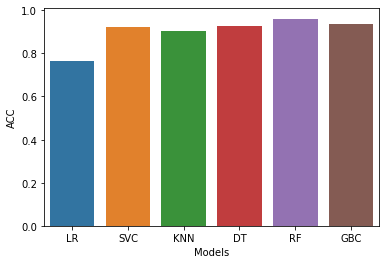

In [72]:
sns.barplot(final_df['Models'], final_df['ACC'])

In [73]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'PRE': [precision_score(y_test, y_predict1),
                               precision_score(y_test, y_predict2),
                               precision_score(y_test, y_predict3),
                               precision_score(y_test, y_predict4),
                               precision_score(y_test, y_predict5),
                               precision_score(y_test, y_predict6),]})
#Check the dataframe
final_df

,Models,PRE
0,LR,0.752182
1,SVC,0.928571
2,KNN,0.850394
3,DT,0.911304
4,RF,0.970480
5,GBC,0.954887


##### Random Forests has the highest precision as well

<AxesSubplot:xlabel='Models', ylabel='PRE'>

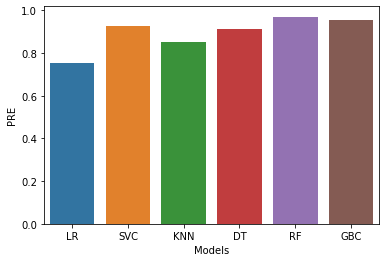

In [74]:
sns.barplot(final_df['Models'], final_df['PRE'])

## 7. Implementing the Solution

In [75]:
# Implementing the Solution
# 

In [76]:
X_resample = scaler.fit_transform(X_resample)

In [77]:
rf.fit(X_resample, y_resample)

RandomForestClassifier()

In [78]:
#pickling
import joblib

In [79]:
joblib.dump(rf, 'Churn_Prediction_model')

['Churn_Prediction_model']

In [80]:
model = joblib.load('Churn_Prediction_model')

In [81]:
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [82]:
churn = model.predict([[12,23,43,45,5,6,34,5,76,89,0,0,23,12,12,3]])
 #0 for the customer will not leave, 1 for te customer will leave

if churn:
    print("The customer will churn/leave")
else:
    print("This customer will stay") 

The customer will churn/leave


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [83]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?